In [1]:
import cv2
import numpy as np

In [59]:
image = cv2.imread("lab2_1_2.jpg")

In [60]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [61]:
t = 20

In [62]:
ret, thresh = cv2.threshold(gray,t,255,cv2.THRESH_BINARY_INV)

In [63]:
cv2.imshow("thresh", thresh)
cv2.waitKey(1)

-1

In [64]:
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [65]:
for contour in contours:
    coord = min(contour[0], key=lambda c: c[0])

In [66]:
point = (coord[0],coord[1])

In [67]:
cv2.circle(image,point,10,(0,255,0),5)

array([[[ 9, 14, 29],
        [ 9, 14, 29],
        [ 9, 14, 29],
        ...,
        [18, 17, 19],
        [18, 17, 19],
        [18, 17, 19]],

       [[ 9, 14, 29],
        [ 9, 14, 29],
        [ 9, 14, 29],
        ...,
        [18, 17, 19],
        [18, 17, 19],
        [18, 17, 19]],

       [[ 9, 14, 29],
        [ 9, 14, 29],
        [ 9, 14, 29],
        ...,
        [18, 17, 19],
        [18, 17, 19],
        [18, 17, 19]],

       ...,

       [[ 9,  7, 13],
        [ 9,  7, 13],
        [ 9,  7, 13],
        ...,
        [10, 10, 16],
        [10, 10, 16],
        [10, 10, 16]],

       [[ 9,  7, 13],
        [ 9,  7, 13],
        [ 9,  7, 13],
        ...,
        [10, 10, 16],
        [10, 10, 16],
        [10, 10, 16]],

       [[ 9,  7, 13],
        [ 9,  7, 13],
        [ 9,  7, 13],
        ...,
        [10, 10, 16],
        [10, 10, 16],
        [10, 10, 16]]], dtype=uint8)

In [68]:
cv2.imshow("Image", image)
cv2.waitKey()
cv2.destroyAllWindows() 

In [235]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

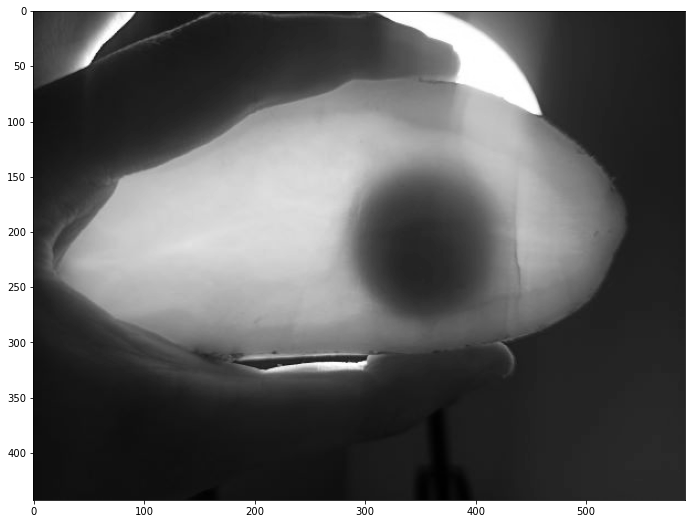

In [275]:
image='lab2_6_2.jpg'
img=cv2.imread(image, 1)
img_orig=img.copy()
img=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(img, cmap='gray')

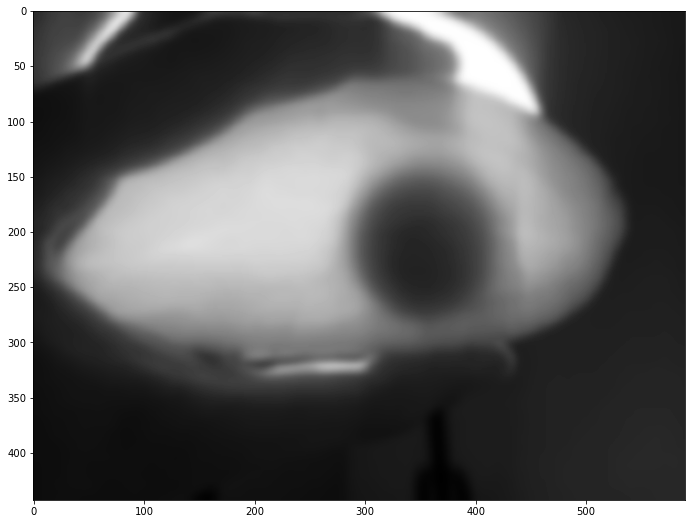

In [276]:
img=cv2.GaussianBlur(img, (21,21), cv2.BORDER_DEFAULT)
plt.rcParams['figure.figsize']=(16,9)
plt.imshow(img, cmap='gray')

In [277]:
all_circs=cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 0.2, 2, param1=30, param2=15, minRadius=52, maxRadius=59)
all_circs_rounded=np.uint16(np.around(all_circs))

In [278]:
print(all_circs_rounded)
print(all_circs_rounded.shape)
print('I have found ' + str(all_circs_rounded.shape[1]) + ' coins.')

[[[346 216  56]
  [342 218  56]]]
(1, 2, 3)
I have found 2 coins.


In [279]:
cont=1
for i in all_circs_rounded[0, :]:
    cv2.circle(img_orig, (i[0], i[1]), i[2], (50,200,200), 5)
    cv2.circle(img_orig, (i[0], i[1]), 2, (255,0,0),3)
    cv2.putText(img_orig, "", (i[0]-30, i[1]+30), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (255,0,0), 2)
    cont +=1

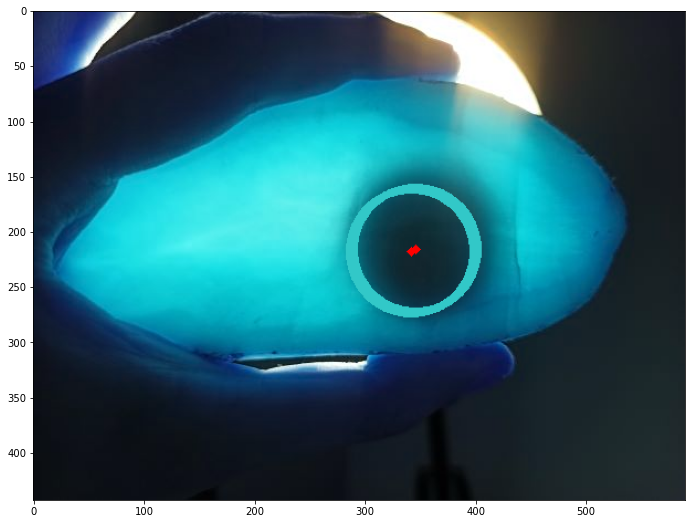

In [280]:
plt.rcParams["figure.figsize"]=(16,9)
plt.imshow(img_orig)